### Initialize the raw data

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score
from matplotlib import ticker
import pandas as pd


I = [a/10 for a in range(5,23)]
I_err = [0.01/2 for a in range(5,23)]
P_IR = [4,39,76,117,157,200,236,272,295,321,352,381,411,429,453,472,510,530]
P_IR_err = [1/2 for a in range(5,23)]
P_LD = [55,134,219,300,384,471,549,634,705,789,867,947,1021,1110,1181,1270,1334,1415]
P_LD_err = [1/2 for a in range(5,23)]

eta = [ P_IR[a]/P_LD[a] for a in range(23-5) ]
eta_err = [ eta[a]*np.sqrt((P_IR_err[a]/P_IR[a])**2 + (P_LD_err[a]/P_LD[a])**2) for a in range(23-5) ]


print(eta)
print(eta_err)

[0.07272727272727272, 0.291044776119403, 0.3470319634703196, 0.39, 0.4088541666666667, 0.42462845010615713, 0.42987249544626593, 0.42902208201892744, 0.41843971631205673, 0.4068441064638783, 0.405997693194925, 0.40232312565997885, 0.40254652301665034, 0.3864864864864865, 0.3835732430143946, 0.3716535433070866, 0.3823088455772114, 0.3745583038869258]
[0.009114919457165116, 0.0038861668224884215, 0.0024166763012752356, 0.001788932021564201, 0.001406709108119596, 0.0011533125436895234, 0.000991330381447279, 0.0008581586644164984, 0.0007688060361920325, 0.0006841530423305374, 0.0006224191552892878, 0.0005691118831996043, 0.0005279046568543546, 0.0004829223385951086, 0.000453446578112859, 0.00042001183083223567, 0.00040127010797755557, 0.0003773305506689202]


### Ready to plot it!

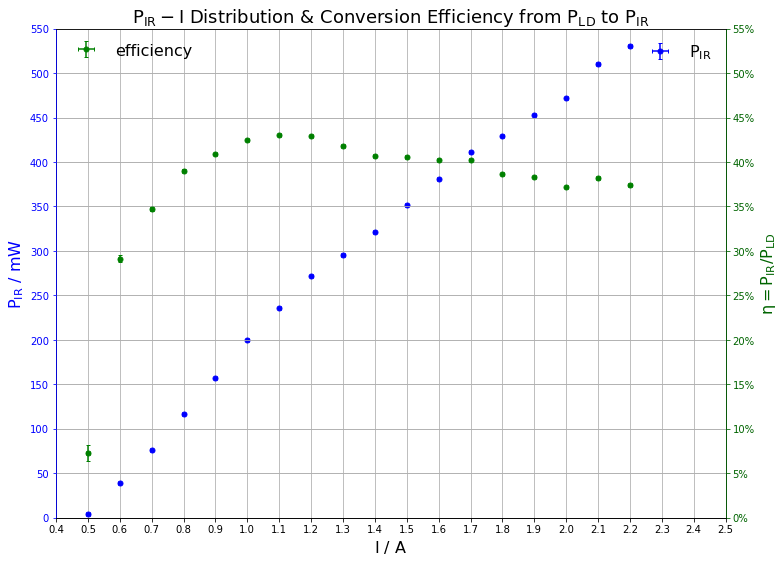

In [128]:
#plt.scatter(x, y, label='data')
fig=plt.figure(figsize=(12,9))

ax1 = fig.add_subplot(111)
ax1.errorbar(I, P_IR, xerr=I_err, yerr=P_IR_err ,fmt='o', label=r'$\rm P_{IR}$', color='blue', markersize=5, ecolor='blue', capsize=2)
ax1.legend(loc=1, frameon=False, fontsize=16)
ax1.set_ylabel(r'$\rm P_{IR}\ /\ mW$', fontsize=16, color="blue") 
ax1.set_xlabel(r'$\rmI\ /\ A$', fontsize=16, color="black") 
ax1.grid()
ax1.set_ylim(0,550)
#ax1.yaxis.label.set_color('red') 
ax1.tick_params(axis='y', colors='blue') 


ax2 = ax1.twinx()
ax2.errorbar(I, eta, xerr=I_err, yerr=eta_err,fmt='o', label='efficiency', color='green', markersize=5, ecolor='green', capsize=2)
ax2.legend(loc=2, frameon=False, fontsize=16)
ax2.set_ylim(0,0.55)
#ax2.set_xlim([0, np.e])
#ax2.set_xlabel('Same X for both exp(-x) and ln(x)')
ax2.set_ylabel(r'$\rm \eta = P_{IR}/P_{LD}$', fontsize=16, color="darkgreen")
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax2.tick_params(axis='y', colors='darkgreen') 

x_major_locator=MultipleLocator(0.1)
y1_major_locator=MultipleLocator(50)
y2_major_locator=MultipleLocator(0.05)

ax1.xaxis.set_major_locator(x_major_locator)
ax1.yaxis.set_major_locator(y1_major_locator)
ax2.yaxis.set_major_locator(y2_major_locator)

plt.title(r"$\rm P_{IR}-I$ Distribution & Conversion Efficiency from $\rm P_{LD}$ to $\rm P_{IR}$", fontsize=18)
#plt.xlabel(r'$\rmI\ /\ A$', fontsize=16, color="black") 
plt.grid(True)
#plt.legend(loc='best', frameon=False)
plt.xlim(0.4,2.5)
#plt.ylim(-5,110)
#plt.axis([30, 400, 100, 400])
#plt.plot(myline, mymodel(myline), color = 'green', linestyle='dashed', label='Linear Fit')
#plt.text(0.5, 1400,r"$y=%.5fx%.5f$"%(a1,a0), fontsize=16,color="green")
ax=plt.gca()
ax.spines['left'].set_color('blue')
ax.spines['right'].set_color('darkgreen')

plt.savefig('phyex2_fig.pdf')
plt.show()